In [1529]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score, roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [1530]:
df=pd.read_excel("Election_Data.xlsx")

In [1531]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [1532]:
# Shape of the dataframe
print("No. of rows: ",df.shape[0], "\n""No. of columns: ",df.shape[1])

No. of rows:  1525 
No. of columns:  10


In [1533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [1534]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [1535]:
df.drop("Unnamed: 0",axis=1,inplace =True)

In [1536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [1537]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print("Categorical columns:",cat) 
print("Numeric columns:",num)


Categorical columns: ['vote', 'gender']
Numeric columns: ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [1538]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [1539]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [1540]:
skewness = df[num].skew()
print("Skewness of variables:")
print(skewness)

Skewness of variables:
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64


In [1541]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [1542]:
df.drop_duplicates(inplace=True) 

In [1543]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [1544]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
vote
Conservative     460
Labour          1057
Name: count, dtype: int64


GENDER :  2
gender
male      709
female    808
Name: count, dtype: int64




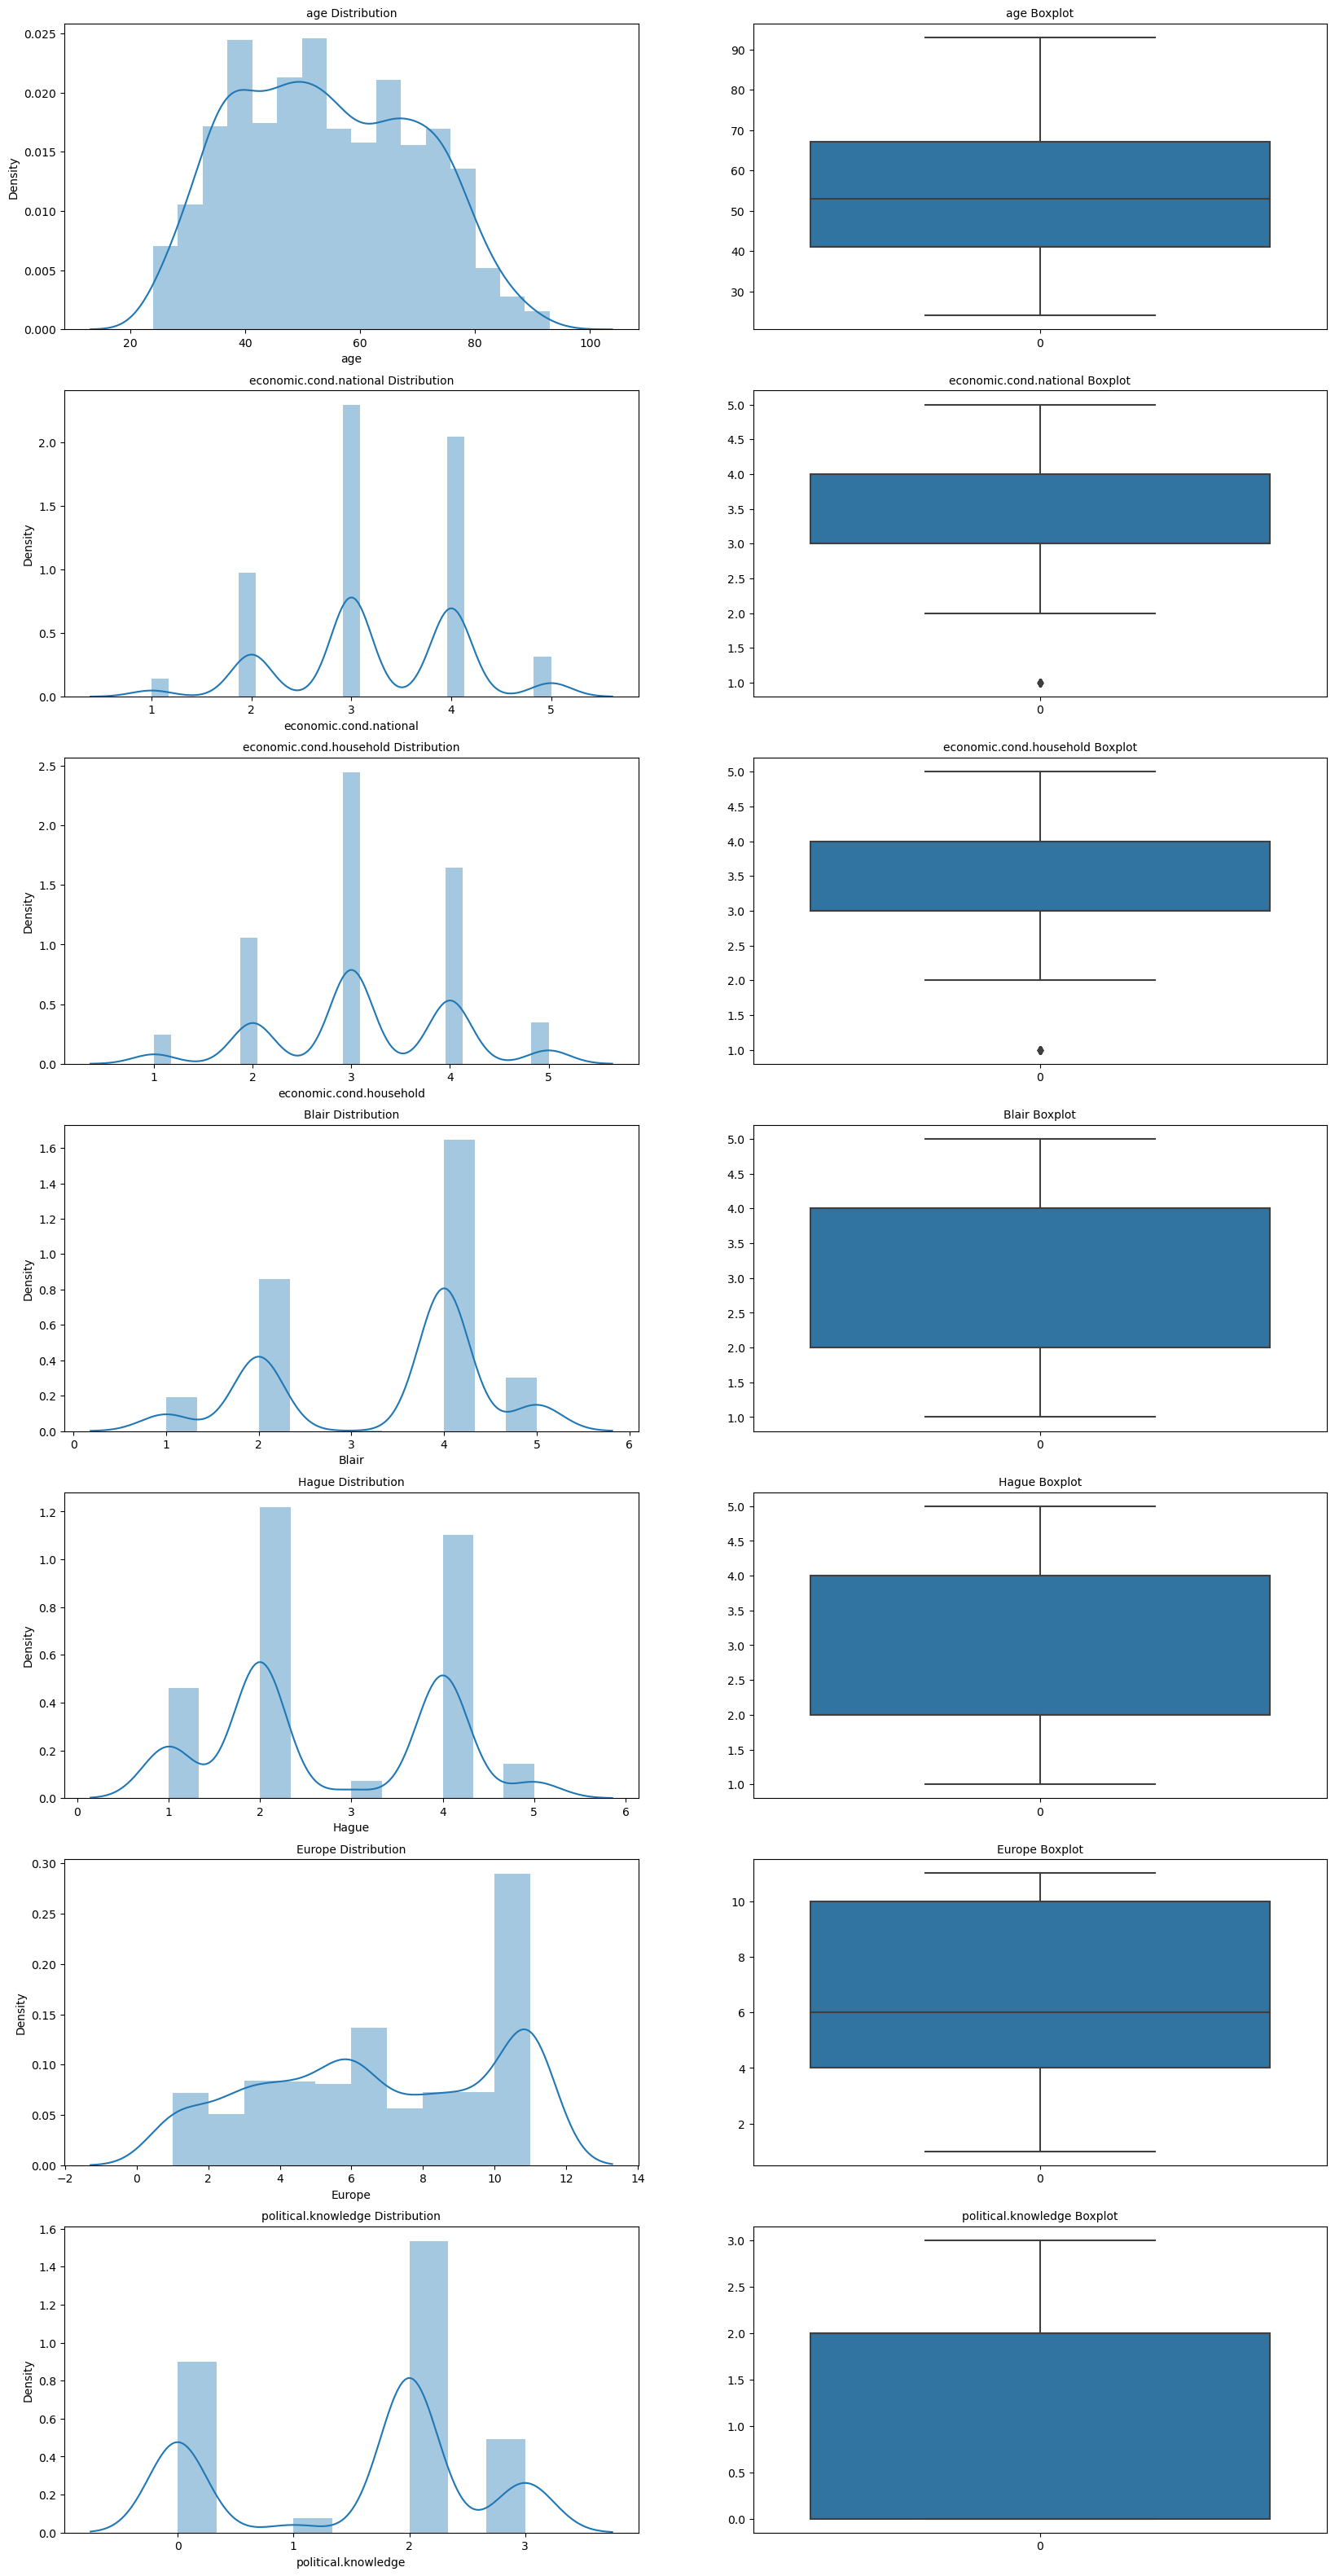

In [1545]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(20,40)

a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)
a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)
a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)
a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)
a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'] , ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=10)
a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=10)
a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] , ax=axes[6][0])
a.set_title("political.knowledge Distribution",fontsize=10)
a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show();

In [1546]:
def univariateAnalysis_category(cat):
    print("Details of " + cat)
    print("----------------------------------------------------------------")
    print(df[cat].value_counts())
    plt.figure(figsize=(5,4))
    ax=df[cat].value_counts().plot.bar(title="Frequency Distribution of " + cat)
    #ax=sns.countplot(data=Auto_Motor_Company,x='Marital_status')
    ax.bar_label(ax.containers[0]);
    plt.show()
    print("       ")

Details of vote
----------------------------------------------------------------
vote
Labour          1057
Conservative     460
Name: count, dtype: int64


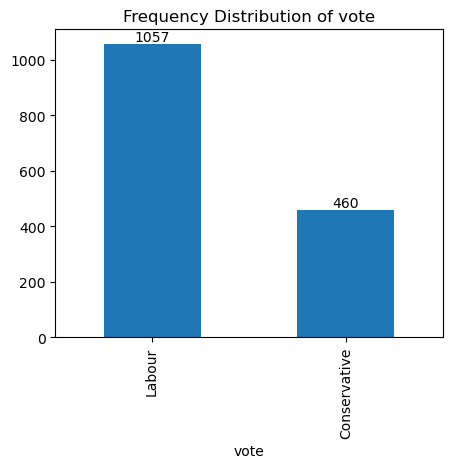

       
Details of gender
----------------------------------------------------------------
gender
female    808
male      709
Name: count, dtype: int64


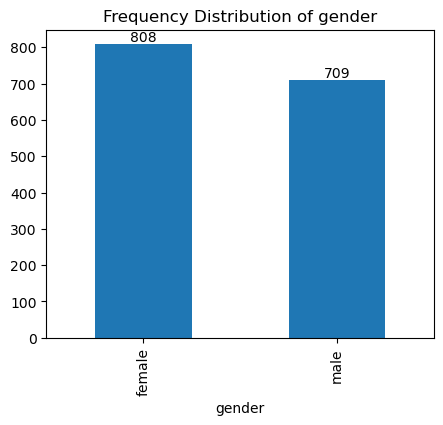

In [1547]:
for x in cat:
    univariateAnalysis_category(x)

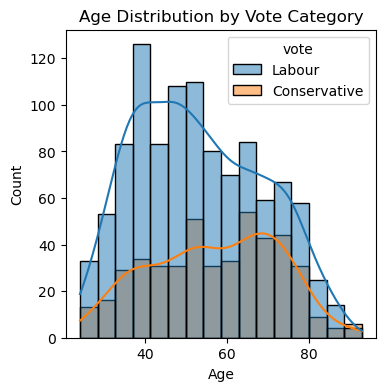

In [1548]:
plt.figure(figsize=(4,4))
sns.histplot(data=df, x='age', hue='vote', kde=True)
plt.xlabel('Age')
plt.title('Age Distribution by Vote Category')
plt.show();

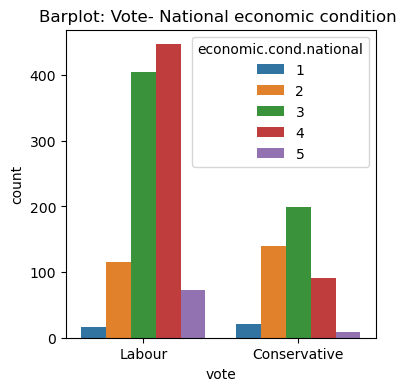

In [1549]:
plt.figure(figsize=(4,4))
plt.title('Barplot: Vote- National economic condition ')
sns.countplot(df, x='vote', hue='economic.cond.national');

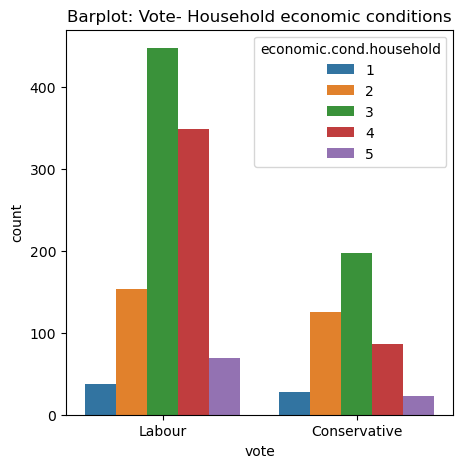

In [1550]:
plt.figure(figsize=(5,5))
plt.title('Barplot: Vote- Household economic conditions')
sns.countplot(df, x='vote', hue='economic.cond.household');

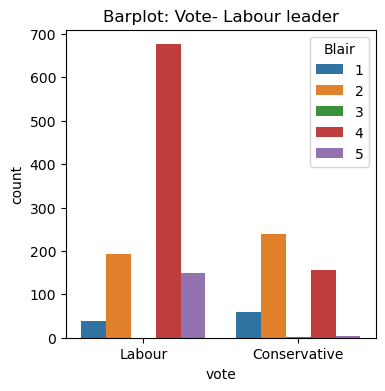

In [1551]:
plt.figure(figsize=(4,4))
plt.title('Barplot: Vote- Labour leader')
sns.countplot(df, x='vote', hue='Blair');

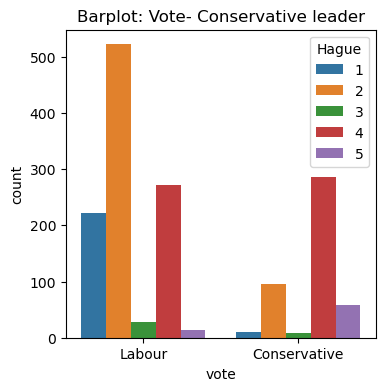

In [1552]:
plt.figure(figsize=(4,4))
plt.title('Barplot: Vote- Conservative leader')
sns.countplot(df, x='vote', hue='Hague');

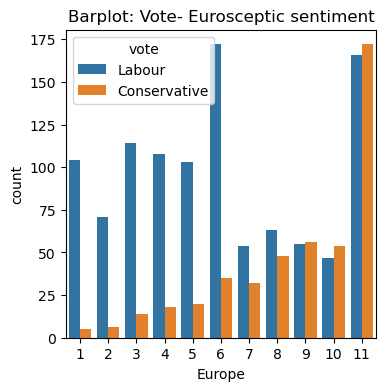

In [1553]:
plt.figure(figsize=(4,4))
plt.title('Barplot: Vote- Eurosceptic sentiment')
sns.countplot(df, x='Europe', hue='vote');

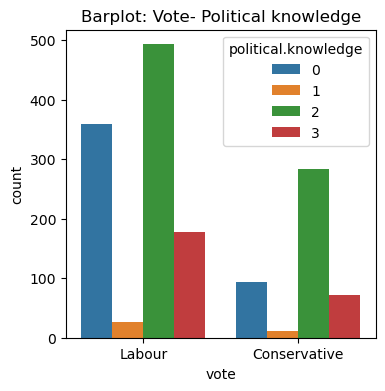

In [1554]:
plt.figure(figsize=(4,4))
plt.title('Barplot: Vote- Political knowledge')
sns.countplot(df, x='vote', hue='political.knowledge');

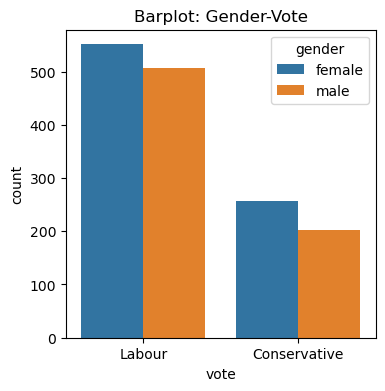

In [1555]:
plt.figure(figsize=(4,4))
plt.title('Barplot: Gender-Vote')
sns.countplot(df, x='vote', hue='gender');

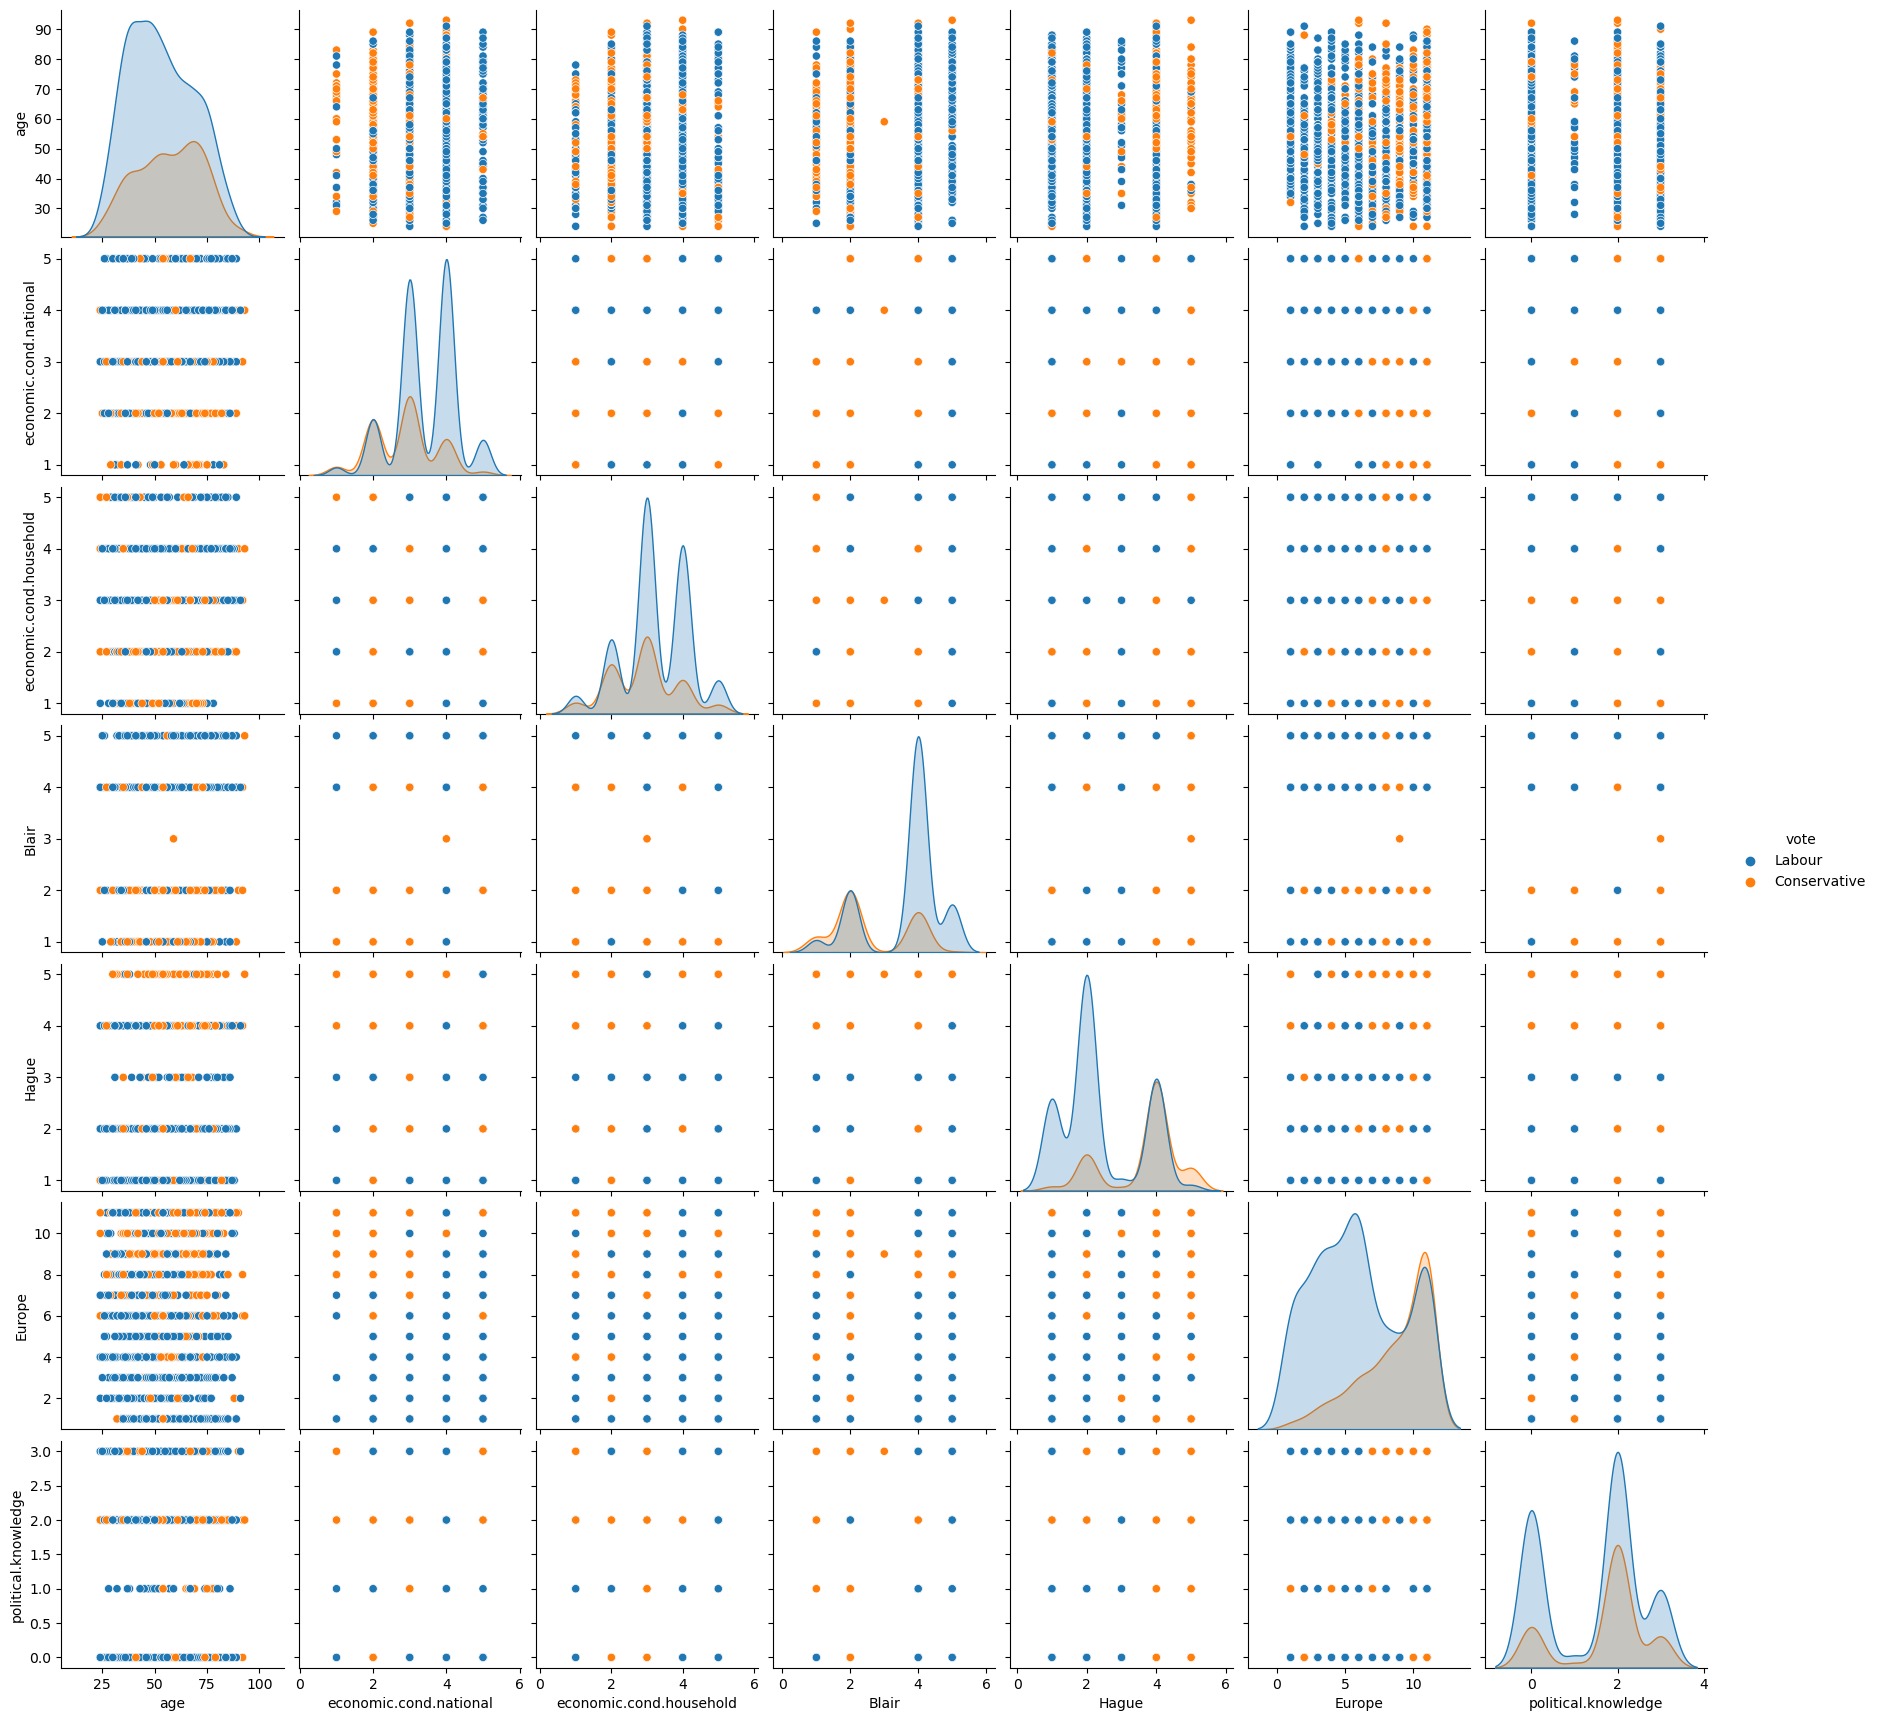

In [1556]:
sns.pairplot(df,hue="vote");

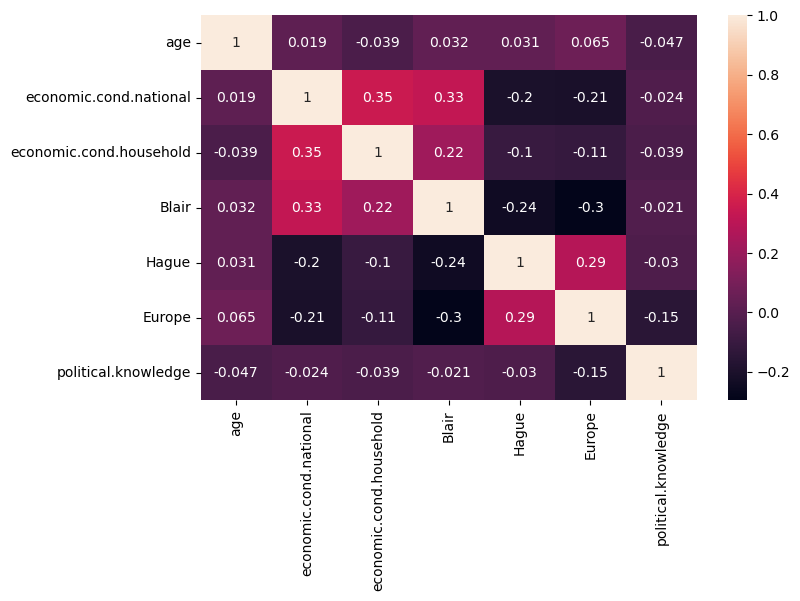

In [1557]:
plt.figure(figsize=(8,5))
sns.heatmap(df[num].corr(),annot=True)
plt.show();

### Outliers treatment

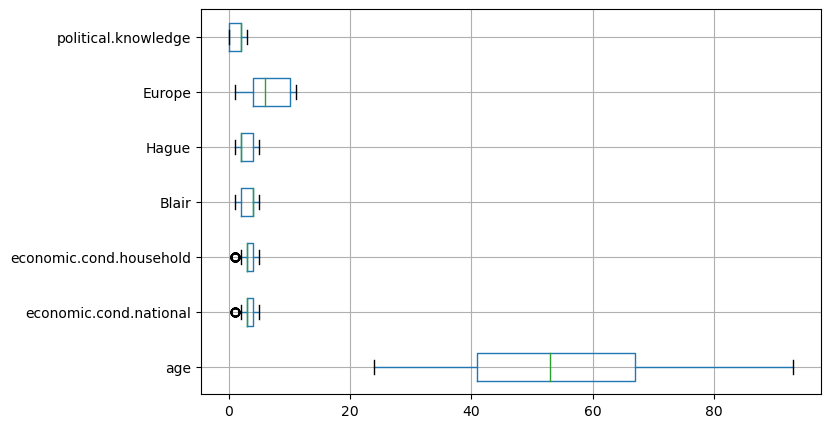

In [1558]:
plt.figure(figsize=(8,5))
df[num].boxplot(vert=0)
plt.show();

### Convert Object Feature types 

In [1559]:
df['gender']=np.where(df['gender'] =='female', 1, df['gender'])
df['gender']=np.where(df['gender'] =='male', 2, df['gender'])

df['vote']=np.where(df['vote'] =='Labour', 0, df['vote'])
df['vote']=np.where(df['vote'] =='Conservative', 1, df['vote'])

In [1560]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,1
1,0,36,4,4,4,4,5,2,2
2,0,35,4,4,5,2,3,2,2
3,0,24,4,2,2,1,4,0,1
4,0,41,2,2,1,1,6,2,2


In [1561]:
df['gender'] = df['gender'].astype('int64')
df['vote'] = df['vote'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int64
dtypes: int64(9)
memory usage: 150.8 KB


In [1562]:
df1 = df.copy()

In [1563]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,1
1,0,36,4,4,4,4,5,2,2
2,0,35,4,4,5,2,3,2,2
3,0,24,4,2,2,1,4,0,1
4,0,41,2,2,1,1,6,2,2


### Encode the data

In [1564]:
df1 = pd.get_dummies(df1, columns=['gender'], drop_first=True)

In [1565]:
df1.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender_2'],
      dtype='object')

In [1566]:
df1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_2
0,0,43,3,3,4,1,2,2,False
1,0,36,4,4,4,4,5,2,True
2,0,35,4,4,5,2,3,2,True
3,0,24,4,2,2,1,4,0,False
4,0,41,2,2,1,1,6,2,True


### Train-Test Split

In [1567]:
# Copy all the predictor variables into X dataframe
X = df1.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = df1['vote']

In [1568]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [1569]:
y_train.value_counts(1)

vote
0    0.71065
1    0.28935
Name: proportion, dtype: float64

In [1570]:
y_test.value_counts(1)

vote
0    0.664474
1    0.335526
Name: proportion, dtype: float64

In [1571]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


### Logistic Regression Model

In [1572]:
from sklearn.linear_model import LogisticRegression

In [1573]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [1574]:
ytrain_predict = model.predict(X_train)
ytrain_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1575]:
ytest_predict = model.predict(X_test)
ytest_predict 

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,

### Getting the Predicted Classes and Probs

In [1576]:
ytrain_predict_prob=model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob)

,0,1
0,0.068175,0.931825
1,0.903016,0.096984
2,0.701584,0.298416
3,0.889790,0.110210
4,0.982777,0.017223
...,...,...
1056,0.954885,0.045115
1057,0.639824,0.360176
1058,0.744179,0.255821
1059,0.759462,0.240538


In [1577]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob)

,0,1
0,0.575716,0.424284
1,0.851574,0.148426
2,0.992813,0.007187
3,0.163650,0.836350
4,0.931593,0.068407
...,...,...
451,0.957914,0.042086
452,0.413026,0.586974
453,0.959415,0.040585
454,0.933940,0.066060


### Model Evaluation

In [1578]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8312912346842601

In [1579]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8355263157894737

In [1580]:
probs_train = model.predict_proba(X_train)
probs_test = model.predict_proba(X_test)

AUC for the Training Data: 0.890
AUC for the Test Data: 0.883


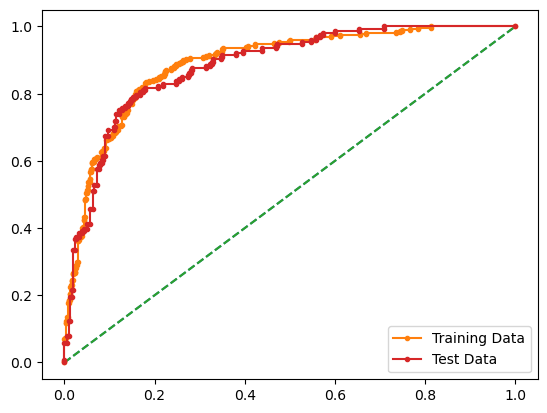

In [1581]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,probs_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,probs_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show();

Confusion Matrix for train:
 [[686  68]
 [111 196]]
Confusion Matrix for test:
 [[268  35]
 [ 40 113]]


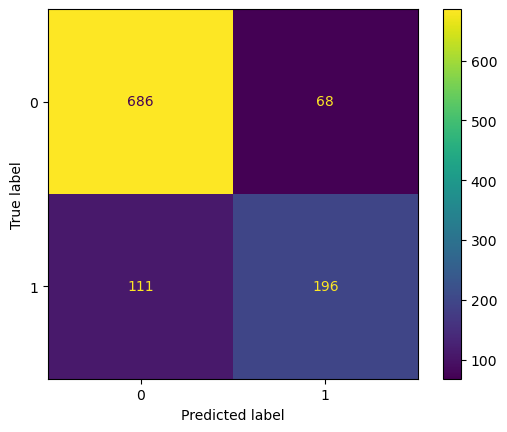

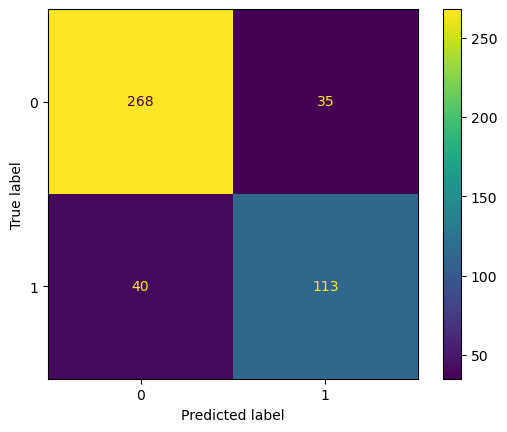

In [1582]:
cm= confusion_matrix(y_train, ytrain_predict)
print("Confusion Matrix for train:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();
cm1=confusion_matrix(y_test, ytest_predict)
print("Confusion Matrix for test:\n", cm1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model.classes_)
disp.plot();

In [1583]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.74      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.88      0.88       303
           1       0.76      0.74      0.75       153

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456
 



## Applying GridSearchCV for Logistic Regression

In [1584]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [1585]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [1586]:
from sklearn.model_selection import GridSearchCV

In [1587]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [1588]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [1589]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag',
                   tol=1e-05)


In [1590]:
best_model = grid_search.best_estimator_

In [1591]:
# Prediction on the training and test set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [1592]:
## Getting the probabilities on the train set

ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.067425,0.932575
1,0.902829,0.097171
2,0.704534,0.295466
3,0.889110,0.110890
4,0.982795,0.017205


In [1593]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.574857,0.425143
1,0.850443,0.149557
2,0.993049,0.006951
3,0.161875,0.838125
4,0.932305,0.067695


[[687  67]
 [111 196]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.75      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



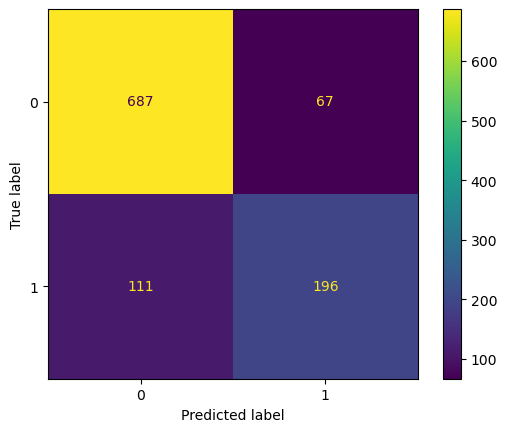

In [1594]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, ytrain_predict)
print (cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_train, ytrain_predict),'\n');

[[267  36]
 [ 43 110]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.75      0.72      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



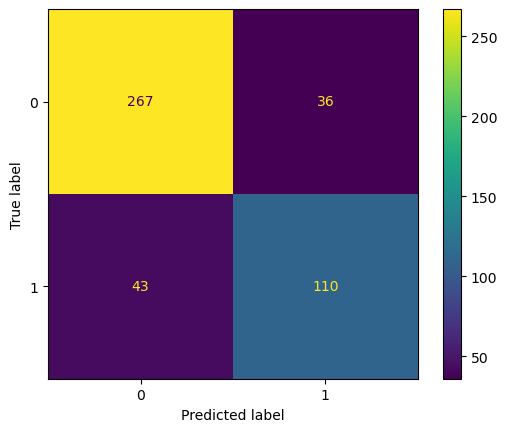

In [1595]:
## Confusion matrix on the test data
cm = confusion_matrix(y_test, ytest_predict)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_test, ytest_predict),'\n');

In [1596]:
# Accuracy - Training Data
best_model.score(X_train, y_train)

0.8322337417530632

AUC: 0.890


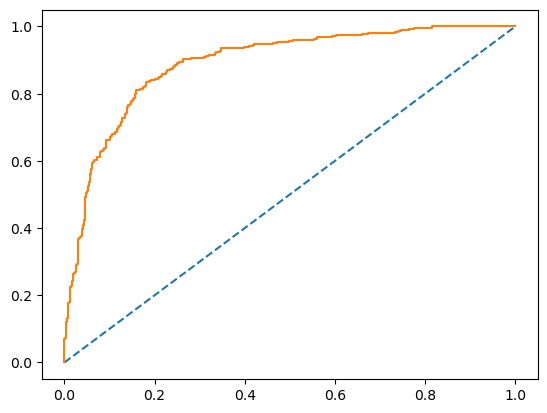

In [1597]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [1598]:
# Accuracy - Test Data
best_model.score(X_test, y_test)

0.8267543859649122

AUC: 0.890


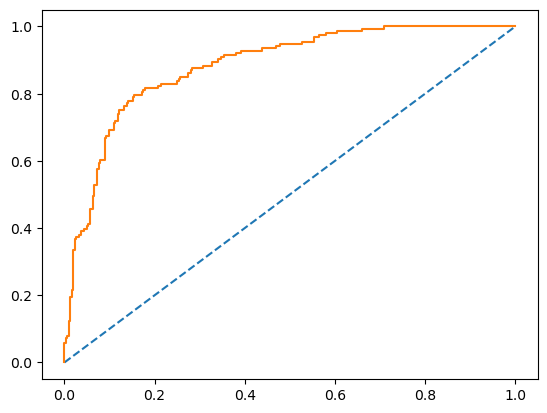

In [1599]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### LDA Model

In [1600]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,y)
model

LinearDiscriminantAnalysis()

### Prediction

In [1601]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [1602]:
pred_class_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1603]:
pred_class_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,

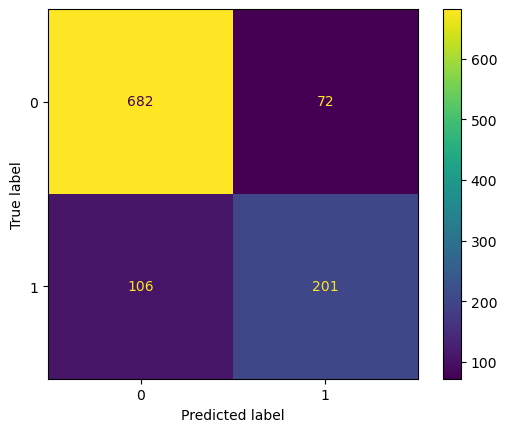

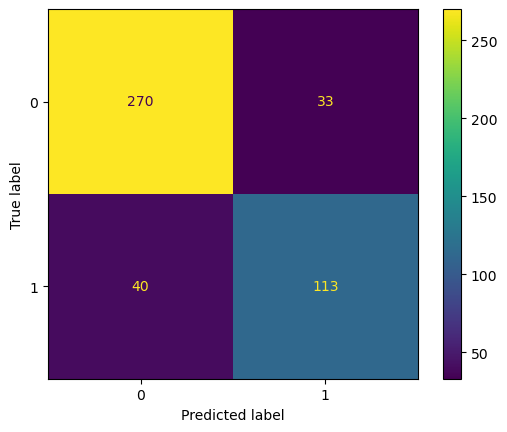

In [1604]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, pred_class_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();
## Confusion matrix on the test data
cm = confusion_matrix(y_test, pred_class_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

In [1605]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.87      0.90      0.88       754
           1       0.74      0.65      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.87      0.89      0.88       303
           1       0.77      0.74      0.76       153

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.84      0.84      0.84       456
 



### Probability prediction for the training and test data

In [1606]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.887
AUC for the Test Data: 0.893


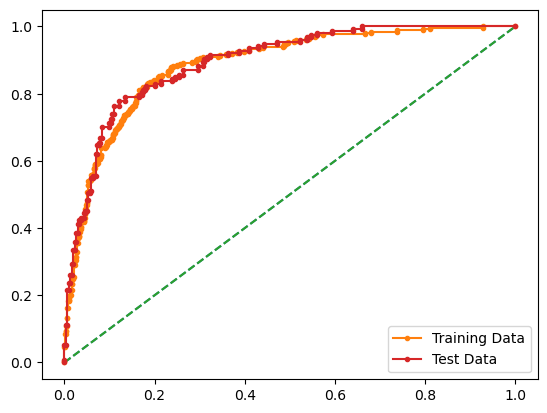

In [1607]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show();

In [1608]:
pred_prob_train[:20]

array([[0.05924226, 0.94075774],
       [0.91577525, 0.08422475],
       [0.64423671, 0.35576329],
       [0.92839311, 0.07160689],
       [0.98495285, 0.01504715],
       [0.96699314, 0.03300686],
       [0.77283939, 0.22716061],
       [0.99700135, 0.00299865],
       [0.25640154, 0.74359846],
       [0.93676479, 0.06323521],
       [0.64333828, 0.35666172],
       [0.99554835, 0.00445165],
       [0.91233743, 0.08766257],
       [0.83372649, 0.16627351],
       [0.9276023 , 0.0723977 ],
       [0.51439571, 0.48560429],
       [0.40793647, 0.59206353],
       [0.18363411, 0.81636589],
       [0.48379779, 0.51620221],
       [0.85007954, 0.14992046]])

In [1609]:
pred_prob_test[:20]

array([[0.52510043, 0.47489957],
       [0.85349146, 0.14650854],
       [0.9904768 , 0.0095232 ],
       [0.15607959, 0.84392041],
       [0.93014145, 0.06985855],
       [0.96201259, 0.03798741],
       [0.54351017, 0.45648983],
       [0.82379895, 0.17620105],
       [0.95277475, 0.04722525],
       [0.82764154, 0.17235846],
       [0.82436941, 0.17563059],
       [0.39715881, 0.60284119],
       [0.99132865, 0.00867135],
       [0.36635161, 0.63364839],
       [0.82820571, 0.17179429],
       [0.53886231, 0.46113769],
       [0.9230354 , 0.0769646 ],
       [0.95098558, 0.04901442],
       [0.07384744, 0.92615256],
       [0.74311711, 0.25688289]])

### Generate Coefficients and intercept for the Linear Discriminant Function

In [1610]:
#intercept value
clf.intercept_ 

array([-3.526319])

In [1611]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[ 0.02348839, -0.42722063, -0.07376585, -0.76223865,  0.96233945,
         0.23141154,  0.50481148, -0.05819087]])

In [1612]:
X.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender_2'],
      dtype='object')

In [1613]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[ 0.02, -0.43, -0.07, -0.76,  0.96,  0.23,  0.5 , -0.06]])

In [1614]:
'''
LDF=(-3.526319)+ X1*0.02 + X2*(-0.43) + X3*(-0.07) + X4*(-0.76) + X5*0.96 + X6*(0.23) + X7*0.5 + X8*(-0.06)
'''

'\nLDF=(-3.526319)+ X1*0.02 + X2*(-0.43) + X3*(-0.07) + X4*(-0.76) + X5*0.96 + X6*(0.23) + X7*0.5 + X8*(-0.06)\n'

In [1615]:
lda= LinearDiscriminantAnalysis()
lor= LogisticRegression()


models=[lda,lor]

accuracy_train=[]
accuracy_test=[]


for i in models:  # Computation of RMSE and R2 values 
    i.fit(X_train,y_train)
    accuracy_train.append(accuracy_score(y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(X_test)))
    # predict probabilities
    

print(pd.DataFrame({'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['LDA','Logistic Regression']))

                     Train Accuracy  Test Accuracy
LDA                        0.834119       0.833333
Logistic Regression        0.835061       0.824561


### Gaussian Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.
GaussianNB implements the Gaussian Naive Bayes algorithm for classification

In [1616]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [1617]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. 
After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its 
parameters.

### Performance Matrix on train data set

In [1618]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

Accuracy: 0.8350612629594723
[[675  79]
 [ 96 211]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.73      0.69      0.71       307

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [1619]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

Accuracy: 0.8223684210526315
[[263  40]
 [ 41 112]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



## Cross Validation on Naive Bayes Model

In [1620]:
from sklearn.model_selection import cross_val_score
train_scores = cross_val_score(NB_model, X_train, y_train, cv=5)
print(train_scores)
print (np.mean(train_scores))
print('\n', metrics.classification_report(y_train, y_train_predict))

[0.79342723 0.84433962 0.87735849 0.80660377 0.81603774]
0.8275533705376915

               precision    recall  f1-score   support

           0       0.88      0.90      0.89       754
           1       0.73      0.69      0.71       307

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [1621]:
test_scores = cross_val_score(NB_model, X_test, y_test, cv=5)
print(test_scores)
print(np.mean(test_scores))
print('\n', metrics.classification_report(y_test, y_test_predict))

[0.7826087  0.84615385 0.86813187 0.85714286 0.78021978]
0.8268514094601052

               precision    recall  f1-score   support

           0       0.87      0.87      0.87       303
           1       0.74      0.73      0.73       153

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



## KNN Model

In [1622]:
# Arrange data into independent variables and dependent variables
X =  df.drop(["vote"],axis=1) ## Features
y = df["vote"]  ## Target

In [1623]:
X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe", "political.knowledge", "gender"]]=X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe", "political.knowledge", "gender"]].apply(zscore)

In [1624]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [1625]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [1626]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [1627]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print("Accuracy:", model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy: 0.8557964184731386
[[690  64]
 [ 89 218]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       754
           1       0.77      0.71      0.74       307

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [1628]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[271  32]
 [ 48 105]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       303
           1       0.77      0.69      0.72       153

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



In [1629]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2171052631578947,
 0.1907894736842105,
 0.17543859649122806,
 0.18201754385964908,
 0.17763157894736847,
 0.17105263157894735,
 0.17763157894736847,
 0.17324561403508776,
 0.16666666666666663,
 0.16666666666666663]

**Plot misclassification error vs k (with k value on X-axis) using matplotlib**

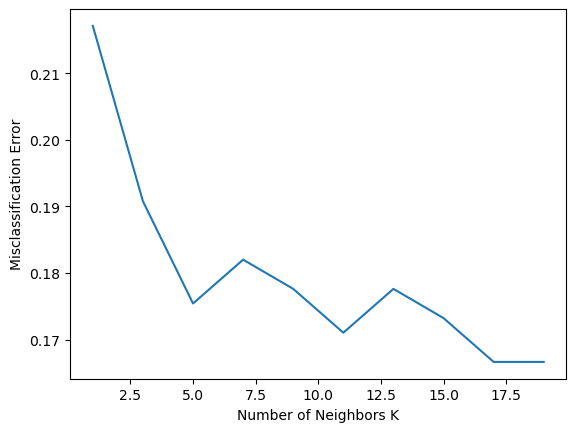

In [1630]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show();

For K = 17 it is giving the best test accuracy lets check train and test for K=17 with other evaluation metrics

In [1631]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [1632]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy: 0.8397737983034873
[[685  69]
 [101 206]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       754
           1       0.75      0.67      0.71       307

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [1633]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Accuracy: 0.8333333333333334
[[279  24]
 [ 52 101]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       303
           1       0.81      0.66      0.73       153

    accuracy                           0.83       456
   macro avg       0.83      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [1634]:
0.8397737983034873 -  0.8333333333333334

0.006440464970153936

#### Lets check train and test for K=11 with other evaluation metrics

In [1635]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=11)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [1636]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy: 0.8397737983034873
[[683  71]
 [ 99 208]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       754
           1       0.75      0.68      0.71       307

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [1637]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Accuracy: 0.8289473684210527
[[273  30]
 [ 48 105]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       303
           1       0.78      0.69      0.73       153

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [1638]:
0.8397737983034873 - 0.8289473684210527

0.010826429882434652

**As the difference between train and test accuracies is 1.08 % which is less than 10%(Industry standard), it is a valid model. So, we can consider 11 as the best value of K.**

### Ensemble: Bagging Classifier - Random Forest

In [1639]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=50,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [1640]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy: 1.0
[[754   0]
 [  0 307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [1641]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Accuracy: 0.8135964912280702
[[274  29]
 [ 56  97]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       303
           1       0.77      0.63      0.70       153

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



### Cross-validation

In [1642]:
from sklearn.model_selection import cross_val_score
#clfCVRF = RandomForestClassifier(n_estimators=50, random_state=1)
train_score = cross_val_score(clfCVRF, X_train, y_train, cv=10)
#test_scores = cross_val_score(RF_model, X_test, y_test, cv=10)
print("Accuracy of trained dataset:",np.mean(train_score))
test_score = cross_val_score(clfCVRF, X_test, y_test, cv=10)
print("Accuracy of test dataset:",np.mean(test_score))
print('\n',"Classification report for train dataset:",'\n',classification_report(y_train, ytrain_predict),'\n');
print("Classification report for test dataset:",'\n',classification_report(y_test, ytest_predict),'\n');

Accuracy of trained dataset: 0.8190354434843943
Accuracy of test dataset: 0.7892753623188407

 Classification report for train dataset: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       754
           1       0.75      0.64      0.69       307

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification report for test dataset: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.75      0.72      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



### Ensemble: Boosting

### Ada Boost

In [1643]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=50,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [1644]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy: 0.8463713477851084
[[688  66]
 [ 97 210]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       754
           1       0.76      0.68      0.72       307

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [1645]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Accuracy: 0.8135964912280702
[[266  37]
 [ 48 105]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       303
           1       0.74      0.69      0.71       153

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



### Gradient Boosting
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [1646]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [1647]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy: 0.8925541941564562
[[708  46]
 [ 68 239]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       754
           1       0.84      0.78      0.81       307

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [1648]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print("Accuracy:",model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Accuracy: 0.8355263157894737
[[276  27]
 [ 48 105]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       303
           1       0.80      0.69      0.74       153

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



## Prob 2

In [1772]:
## Importing the necessary libraries along with the standard import
import numpy as np 
import pandas as pd 
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import json
import re
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer

In [1773]:
#nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
roosevelt_speech=inaugural.raw('1941-Roosevelt.txt')
kennedy_speech=inaugural.raw('1961-Kennedy.txt')
nixon_speech=inaugural.raw('1973-Nixon.txt')

In [1681]:
roosevelt_chars = len(roosevelt_speech)
kennedy_chars = len(kennedy_speech)
nixon_chars = len(nixon_speech)
print("Number of Characters in President Franklin D. Roosevelt speech:", roosevelt_chars)
print("Number of Characters in President John F. Kennedy speech:", kennedy_chars)
print("Number of Characters in President Richard Nixon speech:", nixon_chars)

Number of Characters in President Franklin D. Roosevelt speech: 7571
Number of Characters in President John F. Kennedy speech: 7618
Number of Characters in President Richard Nixon speech: 9991


In [1682]:
roosevelt_words= inaugural.words('1941-Roosevelt.txt')
kennedy_words= inaugural.words('1961-Kennedy.txt')
nixon_words= inaugural.words('1973-Nixon.txt')

In [1683]:
print("Number of Words in President Franklin D. Roosevelt speech:", len(roosevelt_words))
print("Number of Words in President John F. Kennedy speech:", len(kennedy_words))
print("Number of Words in President Richard Nixon speech:", len(nixon_words))

Number of Words in President Franklin D. Roosevelt speech: 1536
Number of Words in President John F. Kennedy speech: 1546
Number of Words in President Richard Nixon speech: 2028


In [1684]:
roosevelt_sentences= inaugural.sents('1941-Roosevelt.txt')
kennedy_sentences= inaugural.sents('1961-Kennedy.txt')
nixon_sentences= inaugural.sents('1973-Nixon.txt')

In [1685]:
print("Number of Sentences in President Franklin D. Roosevelt speech:", len(roosevelt_sentences))
print("Number of Sentences in President John F. Kennedy speech:", len(kennedy_sentences))
print("Number of Sentences in President Richard Nixon speech:", len(nixon_sentences))

Number of Sentences in President Franklin D. Roosevelt speech: 68
Number of Sentences in President John F. Kennedy speech: 52
Number of Sentences in President Richard Nixon speech: 69


## Method 1

In [1656]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)+['--', '``', "''"]
stopwords[:11]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've"]

In [1657]:
all_words1=[]
def lower(x):
    for w in x:
        words=w.lower()
        all_words1.append(words)
        
lower(roosevelt_words)
all_words1[:11]

['on',
 'each',
 'national',
 'day',
 'of',
 'inauguration',
 'since',
 '1789',
 ',',
 'the',
 'people']

In [1658]:
all_words_clean1=[]
def clean(x):
    for word in x:
        if word not in stopwords:
            all_words_clean1.append(word)
            
clean(all_words1)
all_words_clean1[:11]

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states']

In [1659]:
print("Total no. of words in Roosevelt speech after removing stopwords:",len(all_words_clean1))

Total no. of words in Roosevelt speech after removing stopwords: 632


In [1660]:
all_words_freq1=nltk.FreqDist(all_words_clean1)
all_words_freq1

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [1661]:
list(all_words_freq1)[0:3]

['nation', 'know', 'spirit']

In [1662]:
word_features1=[]
def common_features(x):
    for item in x.most_common(3):
        word_features1.append(item[0])

common_features(all_words_freq1)
print("Top 3 words with high frequency in Roosevelt speech:", word_features1)

Top 3 words with high frequency in Roosevelt speech: ['nation', 'know', 'spirit']


In [1663]:
all_words2=[]
def lower(x):
    for w in x:
        words=w.lower()
        all_words2.append(words)
        
lower(kennedy_words)
all_words2[:11]

['vice',
 'president',
 'johnson',
 ',',
 'mr',
 '.',
 'speaker',
 ',',
 'mr',
 '.',
 'chief']

In [1664]:
all_words_clean2=[]
def clean(x):
    for word in x:
        if word not in stopwords:
            all_words_clean2.append(word)
            
clean(all_words2)
all_words_clean2[:11]

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice']

In [1665]:
print("Total no. of words in Kennedy speech after removing stopwords:",len(all_words_clean2))

Total no. of words in Kennedy speech after removing stopwords: 697


In [1666]:
all_words_freq2=nltk.FreqDist(all_words_clean2)
all_words_freq2

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [1667]:
list(all_words_freq2)[0:3]

['let', 'us', 'world']

In [1668]:
word_features2=[]
def common_features(x):
    for item in x.most_common(3):
        word_features2.append(item[0])

common_features(all_words_freq2)
print("Top 3 words with high frequency in Kennedy speech:", word_features2)

Top 3 words with high frequency in Kennedy speech: ['let', 'us', 'world']


In [1669]:
all_words3=[]
def lower(x):
    for w in x:
        words=w.lower()
        all_words3.append(words)
        
lower(nixon_words)
all_words3[:11]

['mr', '.', 'vice', 'president', ',', 'mr', '.', 'speaker', ',', 'mr', '.']

In [1670]:
all_words_clean3=[]
def clean(x):
    for word in x:
        if word not in stopwords:
            all_words_clean3.append(word)
            
clean(all_words3)
all_words_clean3[:11]

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs']

In [1671]:
print("Total no. of words after removing stopwords in Nixon Speech:",len(all_words_clean3))

Total no. of words after removing stopwords in Nixon Speech: 836


In [1672]:
all_words_freq3=nltk.FreqDist(all_words_clean3)
all_words_freq3

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, ...})

In [1673]:
list(all_words_freq3)[0:3]

['us', 'let', 'america']

In [1674]:
word_features3=[]
def common_features(x):
    for item in x.most_common(3):
        word_features3.append(item[0])

common_features(all_words_freq3)
print("Top 3 words with high frequency in Nixon speech:", word_features3)

Top 3 words with high frequency in Nixon speech: ['us', 'let', 'america']


## Method 2-

### Considering it as a list of Speeches

In [1774]:
speeches = [roosevelt_speech, kennedy_speech, nixon_speech]

In [1775]:
data = {'Speech': speeches}
df = pd.DataFrame(data)
df

,Speech
0,On each national day of inauguration since 178...
1,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


## Basic Pre-Processing

### Lower Case conversion

In [1776]:
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

### Removal of Punctuation

In [1778]:
df['Speech'] = df['Speech'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
df['Speech'] = df['Speech'].str.replace(',', '')
df['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson mr. speaker mr. chief j...
2    mr. vice president mr. speaker mr. chief justi...
Name: Speech, dtype: object

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [1779]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Speech']=df['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['Speech'].head()

0    on each nation day of inaugur sinc 1789 the pe...
1    vice presid johnson mr. speaker mr. chief just...
2    mr. vice presid mr. speaker mr. chief justic s...
Name: Speech, dtype: object

### Removal of StopWords

In [1780]:
#nltk.download('stopwords')
#nltk.download('punkt')

In [1781]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
stopwords [:11]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've"]

In [1782]:
Stopwords_Length = df['Speech'].apply(lambda x: len([word for word in x.split() if word in stopwords]))
Stopwords_Length

0    667
1    628
2    911
Name: Speech, dtype: int64

In [1783]:
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df['Speech'].head()

0    nation day inaugur sinc 1789 peopl renew sens ...
1    vice presid johnson mr. speaker mr. chief just...
2    mr. vice presid mr. speaker mr. chief justic s...
Name: Speech, dtype: object

In [1784]:
Stopwords_Length = df['Speech'].apply(lambda x: len([word for word in x.split() if word in stopwords]))
Stopwords_Length

0    0
1    0
2    0
Name: Speech, dtype: int64

### Common Words Removal

In [1785]:
all_words=[i for i in ' '.join(df['Speech']).split()]

In [1786]:
words=pd.DataFrame(data=all_words, columns=['words'])
words.value_counts().head(20)

words  
--         63
us         45
let        39
thi        36
nation     32
new        26
ha         26
america    20
peac       18
becaus     17
year       16
govern     16
respons    15
peopl      15
know       15
world      15
shall      13
freedom    12
human      12
everi      12
Name: count, dtype: int64

In [1787]:
freq =['--', 'us', 'let', 'thi', 'ha', 'becaus']

In [1788]:
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Speech'].head()

0    nation day inaugur sinc 1789 peopl renew sens ...
1    vice presid johnson mr. speaker mr. chief just...
2    mr. vice presid mr. speaker mr. chief justic s...
Name: Speech, dtype: object

In [1789]:
def myTokenizer(text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
    ret_tokens = [st.stem(t) for t in tokens]
    return ret_tokens



In [1790]:
r_words=myTokenizer(df['Speech'].iloc[0])
r_words

['nation',
 'day',
 'inaugur',
 'sinc',
 'peopl',
 'renew',
 'sen',
 'dedic',
 'unit',
 'state',
 'washington',
 'day',
 'task',
 'peopl',
 'wa',
 'creat',
 'weld',
 'togeth',
 'nation',
 'lincoln',
 'day',
 'task',
 'peopl',
 'wa',
 'preserv',
 'nation',
 'disrupt',
 'within',
 'day',
 'task',
 'peopl',
 'save',
 'nation',
 'institut',
 'disrupt',
 'without',
 'come',
 'time',
 'midst',
 'swift',
 'happen',
 'pau',
 'moment',
 'take',
 'stock',
 'recal',
 'place',
 'histori',
 'rediscov',
 'may',
 'be',
 'risk',
 'real',
 'peril',
 'inact',
 'live',
 'nation',
 'determin',
 'count',
 'year',
 'lifetim',
 'human',
 'spirit',
 'life',
 'man',
 'three-scor',
 'year',
 'ten',
 'littl',
 'littl',
 'less',
 'life',
 'nation',
 'full',
 'measur',
 'live',
 'men',
 'doubt',
 'thi',
 'men',
 'believ',
 'democraci',
 'form',
 'govern',
 'frame',
 'life',
 'limit',
 'measur',
 'kind',
 'mystic',
 'artifici',
 'fate',
 'unexplain',
 'reason',
 'tyranni',
 'slaveri',
 'becom',
 'surg',
 'wave',
 '

In [1791]:
print("Total no. of words in Roosevelt speech:",len(r_words))

Total no. of words in Roosevelt speech: 633


In [1792]:
all_words_freq1=nltk.FreqDist(r_words)
all_words_freq1

FreqDist({'nation': 17, 'know': 10, 'peopl': 9, 'spirit': 9, 'life': 9, 'democraci': 9, 'america': 8, 'wa': 7, 'live': 7, 'year': 7, ...})

In [1793]:
list(all_words_freq1)[0:3]

['nation', 'know', 'peopl']

In [1794]:
word_features1=[]
def common_features(x):
    for item in x.most_common(3):
        word_features1.append(item[0])

common_features(all_words_freq1)
print("Top 3 words with high frequency in Roosevelt speech:", word_features1)

Top 3 words with high frequency in Roosevelt speech: ['nation', 'know', 'peopl']


In [1795]:
k_words=myTokenizer(df['Speech'].iloc[1])
k_words

['vice',
 'presid',
 'johnson',
 'mr.',
 'speaker',
 'mr.',
 'chief',
 'justic',
 'presid',
 'eisenhow',
 'vice',
 'presid',
 'nixon',
 'presid',
 'truman',
 'reverend',
 'clergi',
 'fellow',
 'citizen',
 'observ',
 'today',
 'victori',
 'parti',
 'celebr',
 'freedom',
 'symbol',
 'end',
 'well',
 'begin',
 'signifi',
 'renew',
 'well',
 'chang',
 'sworn',
 'befor',
 'almighti',
 'god',
 'solemn',
 'oath',
 'forebear',
 'l',
 'prescrib',
 'nearli',
 'centuri',
 'three',
 'quarter',
 'ago',
 'world',
 'veri',
 'differ',
 'now',
 'man',
 'hold',
 'hi',
 'mortal',
 'hand',
 'power',
 'abolish',
 'form',
 'human',
 'poverti',
 'form',
 'human',
 'life',
 'yet',
 'revolutionari',
 'belief',
 'forebear',
 'fought',
 'still',
 'issu',
 'around',
 'globe',
 'belief',
 'right',
 'man',
 'come',
 'genero',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heir',
 'first',
 'revolut',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alik',
 'torch',
 'pass',
 'new',
 'ge

In [1796]:
print("Total no. of words in Kennedy speech:",len(k_words))

Total no. of words in Kennedy speech: 695


In [1797]:
all_words_freq2=nltk.FreqDist(k_words)
all_words_freq2

FreqDist({'power': 9, 'world': 8, 'nation': 8, 'ani': 8, 'side': 8, 'new': 7, 'pledg': 7, 'ask': 6, 'citizen': 5, 'peac': 5, ...})

In [1798]:
list(all_words_freq2)[0:3]

['power', 'world', 'nation']

In [1799]:
word_features2=[]
def common_features(x):
    for item in x.most_common(3):
        word_features2.append(item[0])

common_features(all_words_freq2)
print("Top 3 words with high frequency in Kennedy speech:", word_features2)

Top 3 words with high frequency in Kennedy speech: ['power', 'world', 'nation']


In [1800]:
n_words=myTokenizer(df['Speech'].iloc[2])
n_words

['mr.',
 'vice',
 'presid',
 'mr.',
 'speaker',
 'mr.',
 'chief',
 'justic',
 'senat',
 'cook',
 'mrs.',
 'eisenhow',
 'fellow',
 'citizen',
 'great',
 'good',
 'countri',
 'share',
 'togeth',
 'met',
 'four',
 'year',
 'ago',
 'america',
 'wa',
 'bleak',
 'spirit',
 'depress',
 'prospect',
 'seemingli',
 'endless',
 'war',
 'abroad',
 'destruct',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peac',
 'world',
 'central',
 'question',
 'befor',
 'is',
 'shall',
 'use',
 'peac',
 'resolv',
 'era',
 'enter',
 'postwar',
 'period',
 'often',
 'been',
 'time',
 'retreat',
 'isol',
 'lead',
 'stagnat',
 'home',
 'invit',
 'new',
 'danger',
 'abroad',
 'resolv',
 'becom',
 'time',
 'great',
 'respon',
 'greatli',
 'born',
 'renew',
 'spirit',
 'promi',
 'america',
 'enter',
 'third',
 'centuri',
 'nation',
 'past',
 'year',
 'saw',
 'far-reach',
 'result',
 'new',
 'polici',
 'peac',
 'continu',
 'revit',
 'tradit',
 'friendship',
 'mission',
 'peke',
 'mo

In [1801]:
print("Total no. of words in Nixon speech:",len(n_words))

Total no. of words in Nixon speech: 812


In [1802]:
all_words_freq3=nltk.FreqDist(n_words)
all_words_freq3

FreqDist({'america': 21, 'peac': 19, 'world': 18, 'new': 15, 'nation': 15, 'respon': 14, 'govern': 11, 'great': 9, 'year': 9, 'home': 9, ...})

In [1803]:
list(all_words_freq3)[0:3]

['america', 'peac', 'world']

In [1804]:
word_features3=[]
def common_features(x):
    for item in x.most_common(3):
        word_features3.append(item[0])

common_features(all_words_freq3)
print("Top 3 words with high frequency in Nixon speech:", word_features3)

Top 3 words with high frequency in Nixon speech: ['america', 'peac', 'world']


**Word Cloud**

In [1805]:
#!pip install wordcloud

In [1806]:
from wordcloud import WordCloud,STOPWORDS

In [1807]:
#r_words_string = ' '.join(r_words)

In [1808]:
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(df['Speech'].iloc[0])

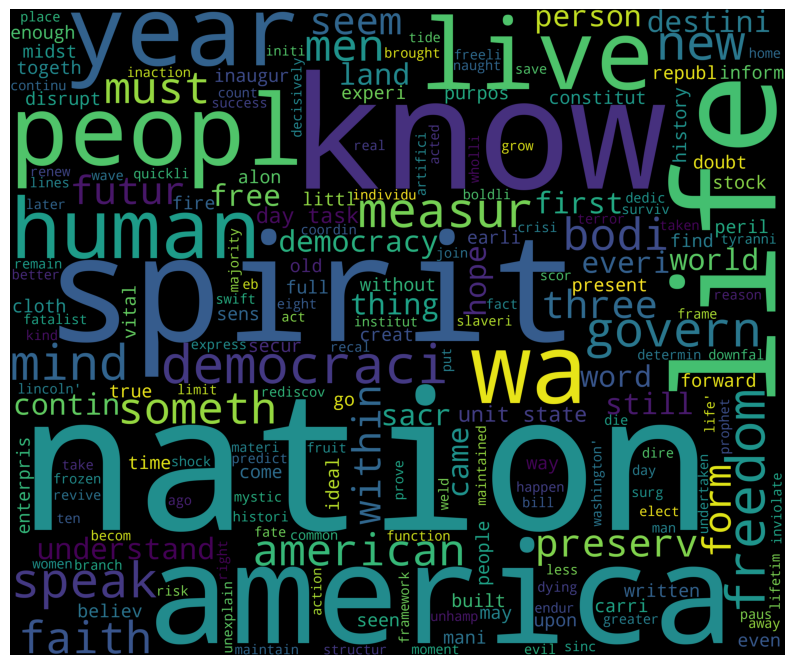

In [1809]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show();

In [1810]:
wordcloud2 = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(df['Speech'].iloc[1])

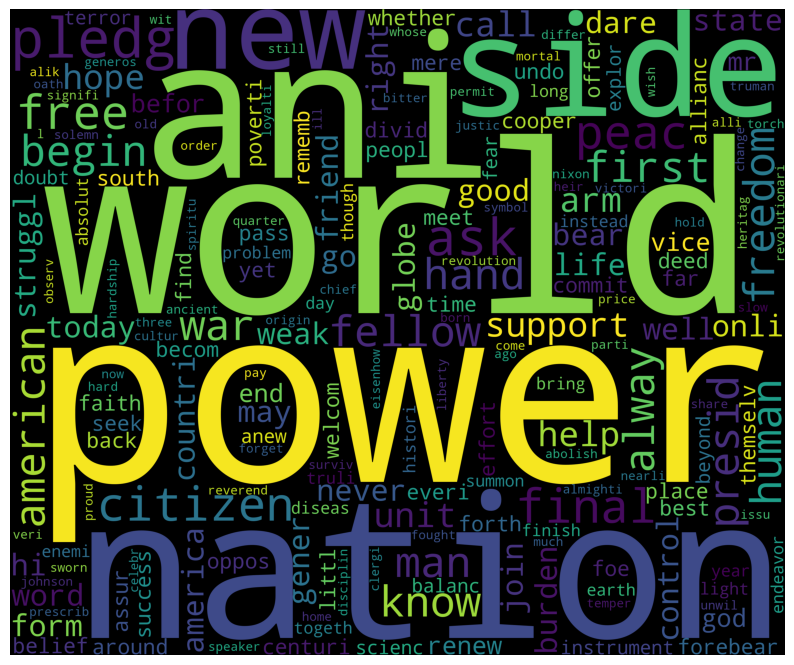

In [1811]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show();

In [1812]:
wordcloud3 = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(df['Speech'].iloc[2])

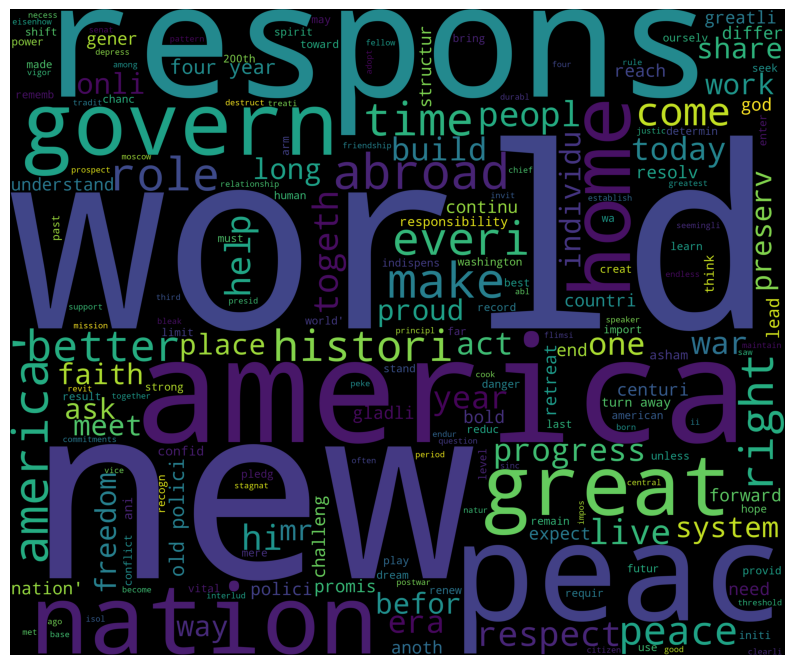

In [1813]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud3)
plt.axis('off')
plt.show();